# Project 2 - Programming for Data Analysis
> ## An Analysis of paleo-present climate data

To keep this project focused, I am breaking this project into 5 steps based on Faraz Mubeen's article on Medium.com from July 2023. In the ['*6 Steps of any data anlytics project*'](https://medium.com/@farazmubeen902/6-steps-of-any-data-analytics-project-bde8d8072f89), he describes the "six fundamental steps involved in any data analytics project". These are:

1. **Ask** - *Formulating the right questions*
2. **Prepare** - *Collecting and organising relevant data*
3. **Process** - *Cleaning and preparing data for analysis*
4. **Analyse** - *Uncovering patterns and insights*
5. **Share** - *Communicating insights through data visualisations*
6. **Act** - *Translating insights into actionable plans*

As the "**Ask**" has already been set by the assignment, I will be following a modified set of steps - *Prepare*, *Process*, *Analyse*, **Predict** and *Share*. 

> ### Academic References
>
> - Mubeen, F. (2023). 6 Steps of any Data Analytics Project. [online] Available at: https://medium.com/@farazmubeen902/6-steps-of-any-data-analytics-project-bde8d8072f89 [Accessed 11 Dec. 2023]. 
>
> - Mateus, C.; Potito, A.; Curley, M. 2020. Reconstruction of a long-term historical daily maximum and minimum air temperature network dataset for Ireland (1831-1968). Geoscience Data Journal. http://dx.doi.org/10.1002/gdj3.92
>
> - GISTEMP Team, 2023: GISS Surface Temperature Analysis (GISTEMP), version 4. NASA Goddard Institute for Space Studies. Dataset accessed 20YY-MM-DD at https://data.giss.nasa.gov/gistemp/.
>
> - Lenssen, N., G. Schmidt, J. Hansen, M. Menne, A. Persin, R. Ruedy, and D. Zyss, 2019: Improvements in the GISTEMP uncertainty model. J. Geophys. Res. Atmos., 124, no. 12, 6307-6326, doi:10.1029/2018JD029522.
> 
> - Rohde, R. A. and Hausfather, Z. (2020). The Berkeley Earth Land/Ocean Temperature Record. Earth System Science Data, 12, 3469–3479. [online] Available at: https://doi.org/10.5194/essd-12-3469-2020 [Accessed 5 Jan. 2024].

> ### Technical References
>
> - Javiya, R. (n.d.). How to Read Text Files with Pandas. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/how-to-read-text-files-with-pandas/ [Accessed 14 Dec. 2023]. Written by Rushi Javiya.


> ### **The Ask**: 
>
> • Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
>
> • Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
>
> • Examine Irish context:
>
> • Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect)
>
> • Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats
>
> • For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).
>
> • Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue
>
> • Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)
>
>Use a Jupyter notebook for your analysis and track your progress using GitHub.
>
>Use an academic referencing style

***
### 1. **Prepare** - *Collecting and organising relevant data*

#### EPICA Dome C - [*800KYr Deuterium Data and Temperature Estimates*](https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt)
The first file I will create a DataFrame for is the EPICA Dome C - 800KYr Deuterium Data and Temperature Estimates data. 

I based the seperator argument from the answer I saw on a [Stack Overflow question similar to my own](https://stackoverflow.com/a/55473279).

In [1]:
# LIbrary Imports
import pandas as pd

# Path to EDC file
file_path = 'files/edc3deuttemp2007.txt'

# Create EDC DataFrame
edc = pd.read_csv(file_path, sep='\s+', skiprows=91)

edc

,Bag,ztop,Age,Deuterium,Temperature
0,1,0.00,-50.00000,NaN,NaN
1,2,0.55,-43.54769,NaN,NaN
2,3,1.10,-37.41829,NaN,NaN
3,4,1.65,-31.61153,NaN,NaN
4,5,2.20,-24.51395,NaN,NaN
...,...,...,...,...,...
5795,5796,3187.25,797408.00000,-440.20,-8.73
5796,5797,3187.80,798443.00000,-439.00,-8.54
5797,5798,3188.35,799501.00000,-441.10,-8.88
5798,5799,3188.90,800589.00000,-441.42,-8.92


In [2]:
# Outputting to CSV to have instead of .txt file
edc.to_csv('files/edc3deuttemp.csv')


Next, I would like to drop the index and use the *Bag* column instead (based on [this example](https://pythonexamples.org/pandas-set-column-as-index/)).

In [3]:
edc = pd.read_csv('files/edc3deuttemp.csv', index_col='Bag', usecols=['Bag', 'ztop', 'Age', 'Deuterium', 'Temperature'])
edc

,ztop,Age,Deuterium,Temperature
Bag,,,,
1,0.00,-50.00000,NaN,NaN
2,0.55,-43.54769,NaN,NaN
3,1.10,-37.41829,NaN,NaN
4,1.65,-31.61153,NaN,NaN
5,2.20,-24.51395,NaN,NaN
...,...,...,...,...
5796,3187.25,797408.00000,-440.20,-8.73
5797,3187.80,798443.00000,-439.00,-8.54
5798,3188.35,799501.00000,-441.10,-8.88


I will now create a DataFrame for the IPCC data sourced from [this link](https://vlegalwaymayo.atu.ie/mod/url/view.php?id=874743) provided by lecturer. 

***
#### IPCC Data (Composite) - [*CO2: Antartic Ice Core*](https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2F2014GL061957&file=grl52461-sup-0003-supplementary.xls)

In [4]:
# Path to IPCC file
file_path = 'files/grl52461-sup-0003-supplementary.xls'

# Read the 'CO2 Composite' sheet starting from line 15
ipcc = pd.read_excel(file_path, sheet_name='CO2 Composite', skiprows=14, index_col=None)
ipcc

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007
...,...,...,...
1896,803925.284376,202.921723,2.064488
1897,804009.870607,207.498645,0.915083
1898,804522.674630,204.861938,1.642851
1899,805132.442334,202.226839,0.689587


Jouzel et al (2007) updated some of the data from the EPICA Dome C data and I will create a DF for this also. 

***
### Jouzel et al (2007) - [*EPICA Dome C Ice Core 800KYr deuterium data and temperature estimates. PANGAEA*](https://doi.pangaea.de/10.1594/PANGAEA.683655)

In [5]:
# Path to IPCC file
file_path = 'files\epicaDC.deuttemp.EDC3-AICC.xls'

# Read the file
jouzel = pd.read_excel(file_path)
jouzel

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453
...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000


***
### Luthi et al (2008)- [*High-resolution carbon dioxide concentration record 650,000–800,000 years before present*](https://www.nature.com/articles/nature06949) 

In [6]:
# Set file path
file_path = 'files/41586_2008_BFnature06949_MOESM31_ESM.xls'

# Read the 'Composite CO2' sheet starting from line 7
luthi = pd.read_excel(file_path, sheet_name='3.  Composite CO2', skiprows=6, index_col=None)
luthi

,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9
...,...,...
1091,794608,199.4
1092,795202,195.2
1093,796467,189.3
1094,797099,188.4


#### Note: 
I am unsure if this is the wrong thing to do but I find the '*Age*' columns to be confusing and so I will make a copy of each of my DataFrames and append '*_rev*' to each name. The purpose of this is to create a new column called IceCoreYear. I am hoping that this will make it easier to pair data with other datasets (particulary the Mauna Loa dataset). I will calculate the calendar year by using 1950 as the base year. 
***

In [7]:
# Library Imports
import math

# Create copies of DF
edc_rev = edc.copy()
ipcc_rev = ipcc.copy()
jouzel_rev = jouzel.copy()
luthi_rev = luthi.copy()

# Creating IceCoreYear columns for each DataFrame
edc_rev['IceCoreYear'] = 1950 - edc['Age']
ipcc_rev['IceCoreYear'] = 1950 - ipcc['Gasage (yr BP) ']
jouzel_rev['IceCoreYear'] = 1950 - jouzel['AICC2012']
luthi_rev['IceCoreYear'] = 1950 - luthi['EDC3_gas_a (yr)']

# Extract only the whole number part before the decimal point
edc_rev['IceCoreYear'] = edc_rev['IceCoreYear'].apply(lambda x: math.floor(x))
ipcc_rev['IceCoreYear'] = ipcc_rev['IceCoreYear'].apply(lambda x: math.floor(x))
jouzel_rev['IceCoreYear'] = jouzel_rev['IceCoreYear'].apply(lambda x: math.floor(x))
luthi_rev['IceCoreYear'] = luthi_rev['IceCoreYear'].apply(lambda x: math.floor(x))

In [8]:
# Review new column in the _rev DFs - Intentionally commented out after checking
#edc_rev
ipcc_rev
#jouzel_rev
#luthi_rev

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv),IceCoreYear
0,-51.030000,368.022488,0.060442,2001
1,-48.000000,361.780737,0.370000,1998
2,-46.279272,359.647793,0.098000,1996
3,-44.405642,357.106740,0.159923,1994
4,-43.080000,353.946685,0.043007,1993
...,...,...,...,...
1896,803925.284376,202.921723,2.064488,-801976
1897,804009.870607,207.498645,0.915083,-802060
1898,804522.674630,204.861938,1.642851,-802573
1899,805132.442334,202.226839,0.689587,-803183


Next, I will add some data from the Mauna Loa dataset, particularly the CO2 (Carbon Dioxide) and CH4 (Methane).

In [9]:
# Creating Mauna Loa CO2 DataFrame
mlco2 = pd.read_csv('files/co2_annmean_mlo.csv',skiprows=43)

# Rename 'mean' column to 'co2_mean'
mlco2.rename(columns={'mean': 'co2_mean'}, inplace=True)

In [10]:
# Creating Mauna Loa CH4 DataFrame
mlch4 = pd.read_csv('files/ch4_annmean_gl.csv',skiprows=43)

# Rename 'mean' column to 'co2_mean'
mlch4.rename(columns={'mean': 'ch4_mean'}, inplace=True)

In [11]:
mlch4

,year,ch4_mean,unc
0,1984,1644.85,0.67
1,1985,1657.29,0.59
2,1986,1670.09,0.74
3,1987,1682.70,0.49
4,1988,1693.28,0.67
5,1989,1704.53,0.55
6,1990,1714.43,0.68
7,1991,1724.78,0.72
8,1992,1735.47,0.57
9,1993,1736.53,0.46


The last data to bring in to the fold is the Irish Mean Temperature data sourced [from the CSO's MTM02 dataset](https://data.cso.ie/table/MTM02) called *Temperature*.

In [12]:
irish_temp = pd.read_csv('files/IrishMeanTempCSO.csv')
irish_temp

,Statistic Label,Month,Meteorological Weather Station,UNIT,VALUE
0,Mean Temperature,1958M01,Belmullet,Degrees C,5.9
1,Mean Temperature,1958M01,Birr,Degrees C,5.0
2,Mean Temperature,1958M01,Valentia Observatory,Degrees C,7.1
3,Mean Temperature,1958M01,Casement,Degrees C,NaN
4,Mean Temperature,1958M01,Claremorris,Degrees C,4.4
...,...,...,...,...,...
11695,Mean Temperature,2022M12,Malin head,Degrees C,5.9
11696,Mean Temperature,2022M12,Mullingar,Degrees C,3.5
11697,Mean Temperature,2022M12,Roches Point,Degrees C,6.2
11698,Mean Temperature,2022M12,Rosslare,Degrees C,NaN


As the global data I have is annual, I will calculate an annual mean for Ireland based on the data from the irish_temp DF but that will be done in section 2. 

#### **Note:** Returning To The Data - Thursday 04/01/24
I have been struggling with this project and part of the reason for this I think comes down from a perception I have that the data looks untidy so I am returning to my source data to see if I can tidy it and perhaps make it more accurate or comprehensive as a result.  

**First**, the ice core data I have opted for is the [*CO2 Antartic Ice Core Data*](https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2F2014GL061957&file=grl52461-sup-0003-supplementary.xls) from Lüthi et al. (2008) and I have sourced this link from *Chapter 1: Framing, Context and Methods* of the IPCC 6th Assessment Report (full report available [here](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_FullReport_small.pdf))


In [13]:
# Creating DataFrame of all Ice Core Data from file mentioned above
co2_comp_file = 'files\grl52461-sup-0003-supplementary.xls'

# Specify the sheet name I want to read in to DF
sheet_name = 'CO2 Composite'

# Get column headers from row 15
header_row = 14

# Create DataFrame from reading the CO2 Composite worksheet, taking header values from row 15 and start on next row 
co2_comp_df = pd.read_excel(co2_comp_file, sheet_name=sheet_name, header=header_row)

# Calculating a calendar year column called 'Year'
co2_comp_df['Year'] = 1950 - co2_comp_df['Gasage (yr BP) ']

# Converting the 'Year' column to integers (to remove decimal values and keep whole numbers)
co2_comp_df['Year'] = co2_comp_df['Year'].astype(int)

# Set the 'Year' column as the index - intentionally commented out as concatenting DFs difficult due to Year being used as index
#co2_comp_df.set_index('Year', inplace=True)

# Save the DataFrame to a CSV file
csv_file_path = 'files/icecorecomposite.csv'
co2_comp_df.to_csv(csv_file_path)



**Second**, for CH4/Methane, I found [*NOAA/WDS Paleoclimatology - Vostok - Methane Data*](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=noaa-icecore-2413), which contains a link to [*Chappelaz et al*](https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/vostok/ch4.txt) text file for methane values in ice core data. I'm not sure if this data will be used as I already have the Mauna Loa data to use but I will see if I can make them work neatly together. 

In [14]:
# Specify the path to the file
chap_txt= 'files/ChappellazEtAl_Nature_345_127-131_CH4.txt'

# Manually set the column names
column_names = ['Depth(m)', 'Gas Age', 'CH4 Concentration (PPBV)', '2.Std.Deviation']

# Read the data into a DataFrame delim_whitespace=True specifies that the data is separated by whitespace.
# skiprows=6 skips the first 6 rows, which are metadata.
ch4_ice = pd.read_csv(chap_txt, delim_whitespace=True, skiprows=6, names=column_names)

# Calculating a calendar year column called 'Year'
ch4_ice['Year'] = 1950 - ch4_ice['Gas Age']

# Set the 'Year' column as the index
#ch4_ice.set_index('Year', inplace=True)

ch4_ice

,Depth(m),Gas Age,CH4 Concentration (PPBV),2.Std.Deviation,Year
0,149.2,2569,668,46,-619
1,173.1,3525,636,50,-1575
2,177.4,3701,595,44,-1751
3,228.7,5864,588,38,-3914
4,236.4,6197,574,52,-4247
...,...,...,...,...,...
93,2009.4,148024,339,29,-146074
94,2016.4,149130,318,24,-147180
95,2030.9,151600,319,30,-149650
96,2042.5,153613,345,23,-151663


**Third**, from [Met Eireann's](https://www.met.ie/cms/assets/uploads/2023/12/LongTermTemperatures_1900-2022_annual.csv) database, I have taken a CSV file called *LongTermTemperatures_1900-200_annual.csv* which is more accurate than the first way I had taken the Irish context into consideration above. 

In [15]:
# Creating new DataFrame from LongTermTemp file from Met Eireann
meteireann_temp = pd.read_csv('files/LongTermTemperatures_1900-2022_annual.csv')

# Renaming Annual column to a more meaningful name
meteireann_temp = meteireann_temp.rename(columns={'Annual': 'IrishMeanTempDegreesC'})

meteireann_temp

,year,IrishMeanTempDegreesC
0,2022,10.9
1,2021,10.5
2,2020,10.4
3,2019,10.5
4,2018,10.3
...,...,...
118,1904,9.1
119,1903,9.1
120,1902,9.2
121,1901,9.1


***
### 2. *Process* - *Cleaning and preparing data for analysis*

I will first merge the IPCC data and the Mauna Loa data into one DataFrame. I will then look at the other ice core dataframes and merge them with the Mauna Loa data and plot them to do a visual check for any obvious discrepancies/flaws in the data.

In [16]:
# Merge mlco2 and mlch4 DFs based on the 'year' column
mauna_loa = pd.merge(mlco2.copy(), mlch4.copy(), on='year', how='outer')

# Dropping unc_x and unc_y based on columns (axis=1)
mauna_loa.drop(['unc_x', 'unc_y'], axis=1, inplace=True)

# Check that DF looks as intended
mauna_loa

,year,co2_mean,ch4_mean
0,1959,315.98,NaN
1,1960,316.91,NaN
2,1961,317.64,NaN
3,1962,318.45,NaN
4,1963,318.99,NaN
...,...,...,...
59,2018,408.72,1857.33
60,2019,411.65,1866.58
61,2020,414.21,1878.93
62,2021,416.41,1895.28


I realised a day after committing the new DataFrames from below that I had merged on the year columns rather than concatenated and that was going to result in me only illustrating the years that were common between my DataFrames. I reviewed the documenation [from Pandas on concatenation](https://pandas.pydata.org/docs/user_guide/merging.html#concatenating-objects) to inform how I approached fixing my initial errors.

Here is a screenshot from before of a sample of the code for easy reference to see what I have fixed. 
> ![Screenshot of sample of original code](files/MergingErrorScreenshot.png)


In [17]:
# Convert 'year' in mauna_loa to numeric type
mauna_loa['year'] = pd.to_numeric(mauna_loa['year'], errors='coerce')

# Convert 'IceCoreYear' in ipcc_rev to numeric type
ipcc_rev['IceCoreYear'] = pd.to_numeric(ipcc_rev['IceCoreYear'], errors='coerce')

# Create a new column 'merged_year' that combines both 'year' and 'IceCoreYear'
mauna_loa['merged_year'] = mauna_loa['year']
ipcc_rev['merged_year'] = ipcc_rev['IceCoreYear']

# Concatenate both DataFrames
ipcc_ml = pd.concat([mauna_loa, ipcc_rev], ignore_index=True)

# Sort the DataFrame by 'merged_year' in descending order
ipcc_ml = ipcc_ml.sort_values(by='merged_year', ascending=False)

# Drop the 'year' and 'IceCoreYear' columns
ipcc_ml = ipcc_ml.drop(['year', 'IceCoreYear'], axis=1)

# Rename the 'merged_year' column to 'Year'
ipcc_ml = ipcc_ml.rename(columns={'merged_year': 'Year'})

# Set the 'Year' column as the index
ipcc_ml = ipcc_ml.set_index('Year')

I will now do the same as above for the other three DFs - *edc_rev*, *jouzel_rev* and *luthi_rev*. 

In [18]:
# Commenting out the below line as this has already been done from the previous code block. 
# mauna_loa['year'] = pd.to_numeric(mauna_loa['year'], errors='coerce')

# Convert 'IceCoreYear' in edc_rev to numeric type
edc_rev['IceCoreYear'] = pd.to_numeric(edc_rev['IceCoreYear'], errors='coerce')

# Create a new column 'merged_year' that combines both 'year' and 'IceCoreYear'
mauna_loa['merged_year'] = mauna_loa['year']
edc_rev['merged_year'] = edc_rev['IceCoreYear']

# Concatenate both DataFrames
edc_ml = pd.concat([mauna_loa, edc_rev], ignore_index=True)

# Sort the DataFrame by 'merged_year' in descending order
edc_ml = edc_ml.sort_values(by='merged_year', ascending=False)

# Drop the 'year' and 'IceCoreYear' columns
edc_ml = edc_ml.drop(['year', 'IceCoreYear'], axis=1)

# Rename the 'merged_year' column to 'Year'
edc_ml = edc_ml.rename(columns={'merged_year': 'Year'})

# Set the 'Year' column as the index
edc_ml = edc_ml.set_index('Year')

In [19]:
# Convert 'IceCoreYear' in jouzel_rev to numeric type
jouzel_rev['IceCoreYear'] = pd.to_numeric(jouzel_rev['IceCoreYear'], errors='coerce')

# Create a new column 'merged_year' that combines both 'year' and 'IceCoreYear'
mauna_loa['merged_year'] = mauna_loa['year']
jouzel_rev['merged_year'] = jouzel_rev['IceCoreYear']

# Concatenate both DataFrames
jouzel_ml = pd.concat([mauna_loa, jouzel_rev], ignore_index=True)

# Sort the DataFrame by 'merged_year' in descending order
jouzel_ml = jouzel_ml.sort_values(by='merged_year', ascending=False)

# Drop the 'year' and 'IceCoreYear' columns
jouzel_ml = jouzel_ml.drop(['year', 'IceCoreYear'], axis=1)

# Rename the 'merged_year' column to 'Year'
jouzel_ml = jouzel_ml.rename(columns={'merged_year': 'Year'})

# Set the 'Year' column as the index
jouzel_ml = jouzel_ml.set_index('Year')

In [20]:
# Convert 'IceCoreYear' in luthi_rev to numeric type
luthi_rev['IceCoreYear'] = pd.to_numeric(luthi_rev['IceCoreYear'], errors='coerce')

# Create a new column 'merged_year' that combines both 'year' and 'IceCoreYear'
mauna_loa['merged_year'] = mauna_loa['year']
luthi_rev['merged_year'] = luthi_rev['IceCoreYear']

# Concatenate both DataFrames
luthi_ml = pd.concat([mauna_loa, luthi_rev], ignore_index=True)

# Sort the DataFrame by 'merged_year' in descending order
luthi_ml = luthi_ml.sort_values(by='merged_year', ascending=False)

# Drop the 'year' and 'IceCoreYear' columns
luthi_ml = luthi_ml.drop(['year', 'IceCoreYear'], axis=1)

# Rename the 'merged_year' column to 'Year'
luthi_ml = luthi_ml.rename(columns={'merged_year': 'Year'})

# Set the 'Year' column as the index
luthi_ml = luthi_ml.set_index('Year')

I now have created four new DataFrames - *ipcc_ml*, *edc_ml*, *jouzel_ml*, *luthi_ml*. The year and IceCoreYear columns are still not merged but that is the next tidying up job. Once I have that tidied, I will move on to step 3 and start with some plotting to see how it looks.

In [21]:
# Uncomment any of the below to test if the previous code block worked
#edc_ml
#ipcc_ml
#jouzel_ml
#luthi_ml

I will finally merge all the data into one DataFrame. I will maintain the integrity of the previous individual DataFrames by copying these into a newly merged DataFrame. 

In [22]:
# Rename columns before concatenating (creating new dataframes with j (for join) appended to maintain originating DFs)
edc_mlj = edc_ml.copy().add_suffix('_edc_ml')
ipcc_mlj = ipcc_ml.copy().add_suffix('_ipcc_ml')
jouzel_mlj = jouzel_ml.copy().add_suffix('_jouzel_ml')
luthi_mlj = luthi_ml.copy().add_suffix('_luthi_ml')

# Concatenate the DataFrames on the 'year' column
merged_df = pd.concat([edc_mlj, ipcc_mlj, jouzel_mlj, luthi_mlj], sort=False)

# Group and sort the merged DataFrame by 'Year'
merged_df = merged_df.groupby('Year').agg('mean')
merged_df = merged_df.sort_values(by='Year', ascending=False)

In [23]:
merged_df

,co2_mean_edc_ml,ch4_mean_edc_ml,ztop_edc_ml,Age_edc_ml,Deuterium_edc_ml,Temperature_edc_ml,co2_mean_ipcc_ml,ch4_mean_ipcc_ml,Gasage (yr BP) _ipcc_ml,CO2 (ppmv)_ipcc_ml,...,ztop_jouzel_ml,EDC3béta_jouzel_ml,AICC2012_jouzel_ml,deutfinal_jouzel_ml,temp_jouzel_ml,acc-EDC3beta_jouzel_ml,co2_mean_luthi_ml,ch4_mean_luthi_ml,EDC3_gas_a (yr)_luthi_ml,CO2 (ppmv)_luthi_ml
Year,,,,,,,,,,,,,,,,,,,,,
2022,418.53,1911.83,NaN,NaN,NaN,NaN,418.53,1911.83,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,418.53,1911.83,NaN,NaN
2021,416.41,1895.28,NaN,NaN,NaN,NaN,416.41,1895.28,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,416.41,1895.28,NaN,NaN
2020,414.21,1878.93,NaN,NaN,NaN,NaN,414.21,1878.93,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,414.21,1878.93,NaN,NaN
2019,411.65,1866.58,NaN,NaN,NaN,NaN,411.65,1866.58,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,411.65,1866.58,NaN,NaN
2018,408.72,1857.33,NaN,NaN,NaN,NaN,408.72,1857.33,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,408.72,1857.33,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-815612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3197.70,816871.6,817562.0,-432.2,211.0,1.529,NaN,NaN,NaN,NaN
-816681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3198.25,817693.6,818631.0,-431.4,211.2,1.548,NaN,NaN,NaN,NaN
-817750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3198.80,818505.5,819700.0,-430.3,211.3,1.576,NaN,NaN,NaN,NaN


You can see I now have multiple co2_mean and ch4_mean columns (one for each of the originating DataFrames for merged_df) so I will rename one of them and drop the others. 

In [24]:
# Drop unneccessary duplicates of ML columns
columns_to_drop = ['co2_mean_ipcc_ml', 'ch4_mean_ipcc_ml', 'co2_mean_luthi_ml', 'ch4_mean_luthi_ml', 'co2_mean_jouzel_ml', 'ch4_mean_jouzel_ml']
merged_df = merged_df.drop(columns=columns_to_drop, errors='ignore')

# Renaming co2_mean and ch4_mean columns
merged_df.rename(columns={'co2_mean_edc_ml': 'co2_mean_ml', 'ch4_mean_edc_ml': 'ch4_mean_ml'}, inplace=True)

In [25]:
merged_df

,co2_mean_ml,ch4_mean_ml,ztop_edc_ml,Age_edc_ml,Deuterium_edc_ml,Temperature_edc_ml,Gasage (yr BP) _ipcc_ml,CO2 (ppmv)_ipcc_ml,sigma mean CO2 (ppmv)_ipcc_ml,bag_jouzel_ml,ztop_jouzel_ml,EDC3béta_jouzel_ml,AICC2012_jouzel_ml,deutfinal_jouzel_ml,temp_jouzel_ml,acc-EDC3beta_jouzel_ml,EDC3_gas_a (yr)_luthi_ml,CO2 (ppmv)_luthi_ml
Year,,,,,,,,,,,,,,,,,,
2022,418.53,1911.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,416.41,1895.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,414.21,1878.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,411.65,1866.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,408.72,1857.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-815612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5815.0,3197.70,816871.6,817562.0,-432.2,211.0,1.529,NaN,NaN
-816681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5816.0,3198.25,817693.6,818631.0,-431.4,211.2,1.548,NaN,NaN
-817750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5817.0,3198.80,818505.5,819700.0,-430.3,211.3,1.576,NaN,NaN


The last merge into this DataFrame involves some Irish context. I have sourced the Irish Mean Temperature records [from the CSO's MTM02 dataset](https://data.cso.ie/table/MTM02) called *Temperature*. This DF was called irish_temp and I will do some tidying up of this before merging in with the rest of the data. Seeing as the other data currently sitting in the merged_df DataFrame is indexed with the year, I will calculate yearly averages for Ireland based on the numerous weather stations in the irish_temp DataFrame. 

In [26]:
irish_temp

,Statistic Label,Month,Meteorological Weather Station,UNIT,VALUE
0,Mean Temperature,1958M01,Belmullet,Degrees C,5.9
1,Mean Temperature,1958M01,Birr,Degrees C,5.0
2,Mean Temperature,1958M01,Valentia Observatory,Degrees C,7.1
3,Mean Temperature,1958M01,Casement,Degrees C,NaN
4,Mean Temperature,1958M01,Claremorris,Degrees C,4.4
...,...,...,...,...,...
11695,Mean Temperature,2022M12,Malin head,Degrees C,5.9
11696,Mean Temperature,2022M12,Mullingar,Degrees C,3.5
11697,Mean Temperature,2022M12,Roches Point,Degrees C,6.2
11698,Mean Temperature,2022M12,Rosslare,Degrees C,NaN


In [27]:
# Drop 'Statistic Label' and 'UNIT' columns
irish_temp = irish_temp.drop(['Statistic Label', 'UNIT'], axis=1)

# Extract year (first four characters) from the 'Month' column and create a new 'Year' column
irish_temp['Year'] = irish_temp['Month'].str[:4].astype(int)

# Calculate the national average mean temp by grouping the rows by 'Year' and 'Meteorological Weather Station'
irish_mean_temp = irish_temp.groupby(['Year', 'Meteorological Weather Station'])['VALUE'].mean().reset_index()

# Group the data by 'Year' to get the national average mean temp
irish_yearly_mean_temp = irish_mean_temp.groupby('Year')['VALUE'].mean().reset_index()

# Rename the columns for clarity
irish_yearly_mean_temp = irish_yearly_mean_temp.rename(columns={'VALUE': 'IrishNationalMeanTempDegreesC'})

# Drop rows with NaN values in 'IrishNationalMeanTempDegreesC' column
irish_yearly_mean_temp = irish_yearly_mean_temp.dropna(subset=['IrishNationalMeanTempDegreesC'])

# Sort by Year Descending
irish_yearly_mean_temp = irish_yearly_mean_temp.sort_values(by='Year', ascending=False)

# Display
irish_yearly_mean_temp

,Year,IrishNationalMeanTempDegreesC
64,2022,10.850833
63,2021,10.466667
62,2020,10.262500
61,2019,10.382500
60,2018,10.243333
...,...,...
4,1962,9.071795
3,1961,9.825000
2,1960,9.670833
1,1959,10.413194


I will merge the *IrishNationalMeanTempDegreesC* column into the merged_df on the *Year* column.

In [28]:
# Merging
merged_df = pd.merge(merged_df, irish_yearly_mean_temp, on='Year', how='left')

In [29]:
# Re-setting Year Column as Index
merged_df = merged_df.set_index('Year')

# Display the resulting DataFrame
merged_df

,co2_mean_ml,ch4_mean_ml,ztop_edc_ml,Age_edc_ml,Deuterium_edc_ml,Temperature_edc_ml,Gasage (yr BP) _ipcc_ml,CO2 (ppmv)_ipcc_ml,sigma mean CO2 (ppmv)_ipcc_ml,bag_jouzel_ml,ztop_jouzel_ml,EDC3béta_jouzel_ml,AICC2012_jouzel_ml,deutfinal_jouzel_ml,temp_jouzel_ml,acc-EDC3beta_jouzel_ml,EDC3_gas_a (yr)_luthi_ml,CO2 (ppmv)_luthi_ml,IrishNationalMeanTempDegreesC
Year,,,,,,,,,,,,,,,,,,,
2022,418.53,1911.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.850833
2021,416.41,1895.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.466667
2020,414.21,1878.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.262500
2019,411.65,1866.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.382500
2018,408.72,1857.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.243333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-815612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5815.0,3197.70,816871.6,817562.0,-432.2,211.0,1.529,NaN,NaN,NaN
-816681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5816.0,3198.25,817693.6,818631.0,-431.4,211.2,1.548,NaN,NaN,NaN
-817750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5817.0,3198.80,818505.5,819700.0,-430.3,211.3,1.576,NaN,NaN,NaN


#### **Note:** Reconfiguring Composite Data - Friday 05/01/24
Based on the changes I made yesterday, I will be making some changes to the outputted composite file and while the name of the composite file will remain the same but the DF that creates those files will be different. 

The DataFrames I will be using are (in no particular order) *co2_comp_df*, *ch4_ice*, *meteireann_temp*, *mauna_loa* and *edc_rev*.

First I will join up the *co2_comp_df* and *ch4_ice* DataFrames. From the above and in the interest of keeping things neat, I will only keep the `Year`, `CO2 (ppmv)` and `CH4 Concentration (PPBV)` columns.

In [30]:
# Listing DataFrames for concatenating - Uncomment
#co2_comp_df
#ch4_ice

# Merging two listed DFs under title of new_comp (new composite) - how='outer' keeps unique Year rows as well as merging on duplicates
new_comp = pd.merge(co2_comp_df, ch4_ice, on='Year', how='outer')

# Keeping the columns I want (Year to be set as index at the end)
new_comp = new_comp[['Year','CO2 (ppmv)', 'CH4 Concentration (PPBV)']]


Next, I will add the *edc_rev* DF and I will only keep the `Temperature` column (renamed to EDC_Temp). I will rename the `merged_year` column to 'Year' and then merge.

In [31]:
# Renaming merged_year column to year
edc_rev = edc_rev.rename(columns={'merged_year': 'Year'})

# Renaming Temperature column to EDC_Temp
edc_rev = edc_rev.rename(columns={'Temperature': 'EDC_Temp'})


I have previously gone wrong at this stage repeatedly - `how='outer'` enables me to keep all the unique rows on the column I am merging on. 

In [32]:
# Merging edc_rev 
new_comp = pd.merge(new_comp, edc_rev, on='Year', how='outer')

# Keeping the columns I want
new_comp = new_comp[['Year','CO2 (ppmv)', 'CH4 Concentration (PPBV)', 'EDC_Temp']]

In [33]:
# Printing DF to check it is working
new_comp

,Year,CO2 (ppmv),CH4 Concentration (PPBV),EDC_Temp
0,2001,368.022488,NaN,NaN
1,1998,361.780737,NaN,NaN
2,1996,359.647793,NaN,NaN
3,1994,357.106740,NaN,NaN
4,1993,353.946685,NaN,NaN
...,...,...,...,...
7733,-795458,NaN,NaN,-8.73
7734,-796493,NaN,NaN,-8.54
7735,-797551,NaN,NaN,-8.88
7736,-798639,NaN,NaN,-8.92


Next DataFrame to join is the Mauna Loa one called *mauna_loa*. I will do some tidying up before merging - renaming the `year` column and ordering by Year descending. I will also rename the `co2_mean` and `ch4_mean` columns to make them identifiable for which DF they originate from.  

In [34]:
# Renaming year column to Year for consistency
mauna_loa = mauna_loa.rename(columns={'year': 'Year'})

# Renaming co2 and ch4 columns
mauna_loa = mauna_loa.rename(columns={'co2_mean': 'ML_CO2Mean'})
mauna_loa = mauna_loa.rename(columns={'ch4_mean': 'ML_CH4Mean'})

# Sort by Year Descending
mauna_loa = mauna_loa.sort_values(by='Year', ascending=False)

In [35]:
mauna_loa

,Year,ML_CO2Mean,ML_CH4Mean,merged_year
63,2022,418.53,1911.83,2022
62,2021,416.41,1895.28,2021
61,2020,414.21,1878.93,2020
60,2019,411.65,1866.58,2019
59,2018,408.72,1857.33,2018
...,...,...,...,...
4,1963,318.99,NaN,1963
3,1962,318.45,NaN,1962
2,1961,317.64,NaN,1961
1,1960,316.91,NaN,1960


In [36]:
# Merging mauna_loa into new_comp 
new_comp = pd.merge(new_comp, mauna_loa, on='Year', how='outer')

# Keeping the columns I want
new_comp = new_comp[['Year','CO2 (ppmv)', 'CH4 Concentration (PPBV)', 'EDC_Temp', 'ML_CO2Mean', 'ML_CH4Mean']]

In [37]:
new_comp

,Year,CO2 (ppmv),CH4 Concentration (PPBV),EDC_Temp,ML_CO2Mean,ML_CH4Mean
0,2001,368.022488,NaN,NaN,371.32,1771.22
1,1998,361.780737,NaN,NaN,366.84,1765.54
2,1996,359.647793,NaN,NaN,362.74,1751.28
3,1994,357.106740,NaN,NaN,358.96,1742.07
4,1993,353.946685,NaN,NaN,357.21,1736.53
...,...,...,...,...,...,...
7765,1978,NaN,NaN,NaN,335.41,NaN
7766,1977,NaN,NaN,NaN,333.84,NaN
7767,1973,NaN,NaN,NaN,329.68,NaN
7768,1971,NaN,NaN,NaN,326.32,NaN


Due to the Mauna Loa data being more recent than the ice core data, I will need to re-order the Year column. You can see above from the printed selection of *new_comp* that the Year column is not in correct descending order. 

In [38]:
# Sort by Year Descending
new_comp = new_comp.sort_values(by='Year', ascending=False)

new_comp

,Year,CO2 (ppmv),CH4 Concentration (PPBV),EDC_Temp,ML_CO2Mean,ML_CH4Mean
7738,2022,NaN,NaN,NaN,418.53,1911.83
7739,2021,NaN,NaN,NaN,416.41,1895.28
7740,2020,NaN,NaN,NaN,414.21,1878.93
7741,2019,NaN,NaN,NaN,411.65,1866.58
7742,2018,NaN,NaN,NaN,408.72,1857.33
...,...,...,...,...,...,...
1896,-801975,202.921723,NaN,NaN,NaN,NaN
1897,-802059,207.498645,NaN,NaN,NaN,NaN
1898,-802572,204.861938,NaN,NaN,NaN,NaN
1899,-803182,202.226839,NaN,NaN,NaN,NaN


Last column to merge in is from the Met Eireann file. 

In [39]:
# Renaming year column to Year for consistency
meteireann_temp = meteireann_temp.rename(columns={'year': 'Year'})

# Merging meteireann_temp into new_comp 
new_comp = pd.merge(new_comp, meteireann_temp, on='Year', how='outer')

In [40]:
new_comp

,Year,CO2 (ppmv),CH4 Concentration (PPBV),EDC_Temp,ML_CO2Mean,ML_CH4Mean,IrishMeanTempDegreesC
0,2022,NaN,NaN,NaN,418.53,1911.83,10.9
1,2021,NaN,NaN,NaN,416.41,1895.28,10.5
2,2020,NaN,NaN,NaN,414.21,1878.93,10.4
3,2019,NaN,NaN,NaN,411.65,1866.58,10.5
4,2018,NaN,NaN,NaN,408.72,1857.33,10.3
...,...,...,...,...,...,...,...
7779,1913,NaN,NaN,NaN,NaN,NaN,9.4
7780,1907,NaN,NaN,NaN,NaN,NaN,9.0
7781,1906,NaN,NaN,NaN,NaN,NaN,9.3
7782,1904,NaN,NaN,NaN,NaN,NaN,9.1


The last thing I would like to get added to this is a global record of annual mean temperature to compare to the Irish context. I have opted for [Rohde and Hausfather's *Berkeley Earth Land/Ocean Temperature Record*](https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Land_and_Ocean_summary.txt) and will calculate the average global mean temp from this file. You can see in the text file that the estimated Jan 1951-Dec 1980 global mean temperature (C) were found to be: 
>   "Using air temperature above sea ice:   14.104 +/- 0.020
>
>   Using water temperature below sea ice: 14.699 +/- 0.020"
> - Rohde, R. A. and Hausfather, Z. (2020). 

I will first create a DataFrame for this data using the text file called *RohdeHausfather_TheBerkeleyEarthLandOceanTemperature.txt*

In [57]:
# Specify the path to the file
berkley_txt= 'files/RohdeHausfather_TheBerkeleyEarthLandOceanTemperature.txt'

# Manually set the column names
column_names = ['Year', 'AnnualAnomaly_AirTemp', 'AnnualUnc_AirTemp', 'FiveYearAnomaly_AirTemp', 'FiveYearUnc_AirTemp', 'AnnualAnomaly_WaterTemp', 'AnnualUnc_WaterTemp', 'FiveYearAnomaly_WaterTemp', 'FiveYearUnc_WaterTemp']

# Read the data into a DataFrame delim_whitespace=True specifies that the data is separated by whitespace.
# skiprows=58 skips the first 58 rows, which are metadata.
berkley_earth = pd.read_csv(berkley_txt, delim_whitespace=True, skiprows=58, names=column_names)

berkley_earth

,Year,AnnualAnomaly_AirTemp,AnnualUnc_AirTemp,FiveYearAnomaly_AirTemp,FiveYearUnc_AirTemp,AnnualAnomaly_WaterTemp,AnnualUnc_WaterTemp,FiveYearAnomaly_WaterTemp,FiveYearUnc_WaterTemp
0,1850,-0.457,0.171,NaN,NaN,-0.435,0.155,NaN,NaN
1,1851,-0.343,0.174,NaN,NaN,-0.337,0.156,NaN,NaN
2,1852,-0.316,0.167,-0.349,0.119,-0.299,0.152,-0.335,0.110
3,1853,-0.319,0.134,-0.319,0.107,-0.305,0.123,-0.305,0.100
4,1854,-0.312,0.134,-0.334,0.102,-0.302,0.123,-0.319,0.095
...,...,...,...,...,...,...,...,...,...
168,2018,0.883,0.026,0.992,0.025,0.761,0.024,0.868,0.022
169,2019,1.019,0.032,0.959,0.025,0.891,0.029,0.841,0.022
170,2020,1.045,0.031,0.954,0.026,0.930,0.028,0.834,0.023
171,2021,0.890,0.031,NaN,NaN,0.781,0.028,NaN,NaN


Using the 14.104 degrees celsius air temperature and 14.699 water temperature from the notes at the top of Rohde, R. A. and Hausfather, Z. (2020)'s .txt file (referenced above), I am calculating four new columns, one each for annual mean and one each for 5 year means. 

In [58]:
# Calculate Annual Mean columns
berkley_earth['AnnualMean_AirTemp'] = 14.104 + berkley_earth['AnnualAnomaly_AirTemp']
berkley_earth['AnnualMean_WaterTemp'] = 14.699 + berkley_earth['AnnualAnomaly_WaterTemp']

# Calculate Five-Year Mean columns
berkley_earth['FiveYearMean_AirTemp'] = 14.104 + berkley_earth['FiveYearAnomaly_AirTemp']
berkley_earth['FiveYearMean_WaterTemp'] = 14.699 + berkley_earth['FiveYearAnomaly_WaterTemp']

Lastly, for this *berkley_earth* DataFrame, I will reorder and name the specific columns I want to keep for use in my composite file and create a separate DataFrame to keep my work tidy-ish. 

In [61]:
# Keeping the columns I want in tidy DF called berkley_df
berkley_df = berkley_earth[['Year','AnnualMean_AirTemp','AnnualAnomaly_AirTemp', 'AnnualMean_WaterTemp','AnnualAnomaly_WaterTemp','FiveYearMean_AirTemp','FiveYearAnomaly_AirTemp','FiveYearMean_WaterTemp','FiveYearAnomaly_WaterTemp']]

# Sort by Year Descending - not done before now to properly calculate 5 Year Means. 
berkley_df = berkley_df.sort_values(by='Year', ascending=False)

berkley_df

,Year,AnnualMean_AirTemp,AnnualAnomaly_AirTemp,AnnualMean_WaterTemp,AnnualAnomaly_WaterTemp,FiveYearMean_AirTemp,FiveYearAnomaly_AirTemp,FiveYearMean_WaterTemp,FiveYearAnomaly_WaterTemp
172,2022,15.036,0.932,15.505,0.806,NaN,NaN,NaN,NaN
171,2021,14.994,0.890,15.480,0.781,NaN,NaN,NaN,NaN
170,2020,15.149,1.045,15.629,0.930,15.058,0.954,15.533,0.834
169,2019,15.123,1.019,15.590,0.891,15.063,0.959,15.540,0.841
168,2018,14.987,0.883,15.460,0.761,15.096,0.992,15.567,0.868
...,...,...,...,...,...,...,...,...,...
4,1854,13.792,-0.312,14.397,-0.302,13.770,-0.334,14.380,-0.319
3,1853,13.785,-0.319,14.394,-0.305,13.785,-0.319,14.394,-0.305
2,1852,13.788,-0.316,14.400,-0.299,13.755,-0.349,14.364,-0.335
1,1851,13.761,-0.343,14.362,-0.337,NaN,NaN,NaN,NaN


Time to merge this *berkley_df* DataFrame into my *new_comp* DataFrame. 

In [62]:
# Merging berkley_df into new_comp 
new_comp = pd.merge(new_comp, berkley_df, on='Year', how='outer')

new_comp

,Year,CO2 (ppmv),CH4 Concentration (PPBV),EDC_Temp,ML_CO2Mean,ML_CH4Mean,IrishMeanTempDegreesC,AnnualMean_AirTemp,AnnualAnomaly_AirTemp,AnnualMean_WaterTemp,AnnualAnomaly_WaterTemp,FiveYearMean_AirTemp,FiveYearAnomaly_AirTemp,FiveYearMean_WaterTemp,FiveYearAnomaly_WaterTemp
0,2022,NaN,NaN,NaN,418.53,1911.83,10.9,15.036,0.932,15.505,0.806,NaN,NaN,NaN,NaN
1,2021,NaN,NaN,NaN,416.41,1895.28,10.5,14.994,0.890,15.480,0.781,NaN,NaN,NaN,NaN
2,2020,NaN,NaN,NaN,414.21,1878.93,10.4,15.149,1.045,15.629,0.930,15.058,0.954,15.533,0.834
3,2019,NaN,NaN,NaN,411.65,1866.58,10.5,15.123,1.019,15.590,0.891,15.063,0.959,15.540,0.841
4,2018,NaN,NaN,NaN,408.72,1857.33,10.3,14.987,0.883,15.460,0.761,15.096,0.992,15.567,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,1863,NaN,NaN,NaN,NaN,NaN,NaN,13.759,-0.345,14.376,-0.323,13.696,-0.408,14.316,-0.383
7801,1860,NaN,NaN,NaN,NaN,NaN,NaN,13.714,-0.390,14.322,-0.377,13.695,-0.409,14.313,-0.386
7802,1857,NaN,NaN,NaN,NaN,NaN,NaN,13.546,-0.558,14.172,-0.527,13.730,-0.374,14.342,-0.357
7803,1855,NaN,NaN,NaN,NaN,NaN,NaN,13.799,-0.305,14.414,-0.285,13.721,-0.383,14.334,-0.365


***
The last job before moving on to the analysis stage is to output this as a CSV file and JSON file, [using the documenatation from Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html), as per project instructions.

In [63]:
new_comp.to_csv('files/compositedata.csv')
new_comp.to_json('files/compositedata.json', orient='records', lines=True)

***
### 3. *Analyse* - *Uncovering patterns and insights*

In [42]:
# Library Imports - Plotting libraries (may change over time)
import matplotlib.pyplot as plt
import seaborn as sns

### **Analysis:**

First, I will create a DataFrame from the *compositedata.csv* file in the *files* folder. 

In [43]:
# Creating 'composite' DataFrame
composite = pd.read_csv('files/compositedata.csv')

# Set 'Year' column as the index
composite.set_index('Year', inplace=True)

In [44]:
composite

,co2_mean_ml,ch4_mean_ml,ztop_edc_ml,Age_edc_ml,Deuterium_edc_ml,Temperature_edc_ml,Gasage (yr BP) _ipcc_ml,CO2 (ppmv)_ipcc_ml,sigma mean CO2 (ppmv)_ipcc_ml,bag_jouzel_ml,ztop_jouzel_ml,EDC3béta_jouzel_ml,AICC2012_jouzel_ml,deutfinal_jouzel_ml,temp_jouzel_ml,acc-EDC3beta_jouzel_ml,EDC3_gas_a (yr)_luthi_ml,CO2 (ppmv)_luthi_ml,IrishNationalMeanTempDegreesC
Year,,,,,,,,,,,,,,,,,,,
2022,418.53,1911.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.850833
2021,416.41,1895.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.466667
2020,414.21,1878.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.262500
2019,411.65,1866.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.382500
2018,408.72,1857.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.243333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-815612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5815.0,3197.70,816871.6,817562.0,-432.2,211.0,1.529,NaN,NaN,NaN
-816681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5816.0,3198.25,817693.6,818631.0,-431.4,211.2,1.548,NaN,NaN,NaN
-817750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5817.0,3198.80,818505.5,819700.0,-430.3,211.3,1.576,NaN,NaN,NaN


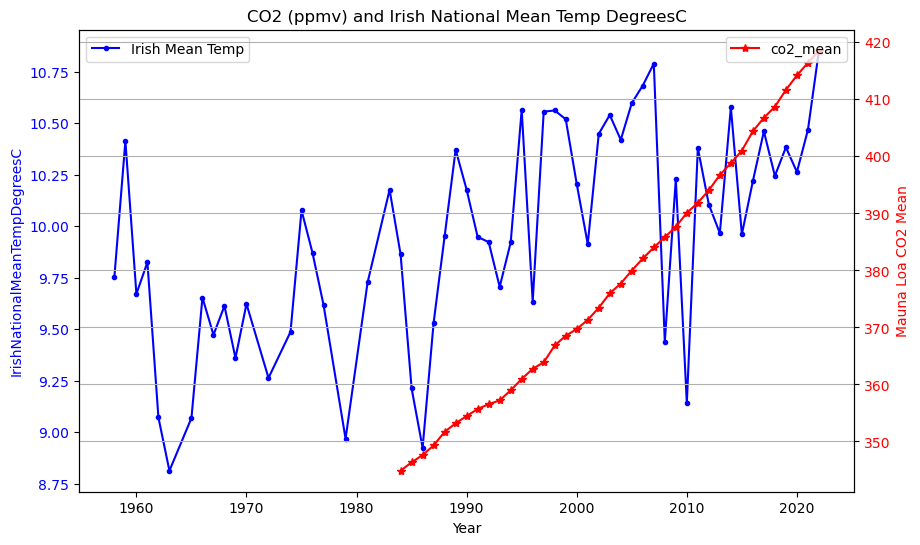

In [45]:
# First Attempt At Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot on the first y-axis
ax1.plot(composite.index, composite['IrishNationalMeanTempDegreesC'], label='Irish Mean Temp', marker='.', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('IrishNationalMeanTempDegreesC', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(composite.index, composite['co2_mean_ml'], label='co2_mean', marker='*', color='red')
ax2.set_ylabel('Mauna Loa CO2 Mean', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Set title of plot and show it
plt.title('CO2 (ppmv) and Irish National Mean Temp DegreesC')
plt.grid(True)
plt.show()

A quick visual inspection shows that the increasing CO2 measurements from the Mauna Loa observatory may have a correlation with the Irish mean temperature. I will try the [corr.map() function](https://datatofish.com/correlation-matrix-pandas/) from Pandas to see how strong this correlation is. 

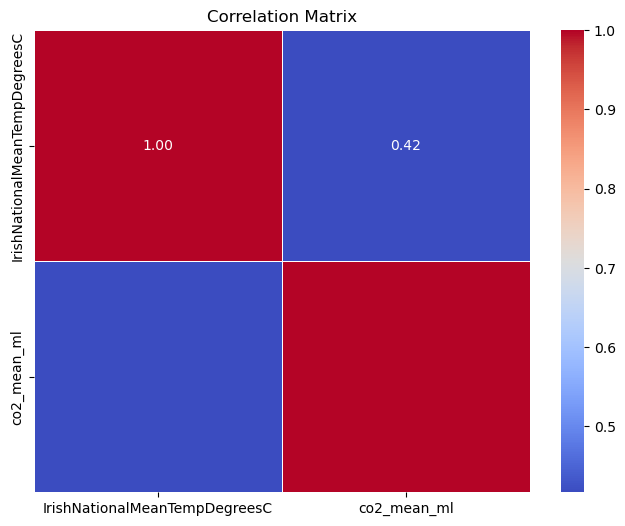

In [46]:
# Narrowing list of columns to just the relevant columns for correlation
columns_of_interest = ['IrishNationalMeanTempDegreesC', 'co2_mean_ml']

# Create a subset DataFrame with selected columns
subset_df = composite[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The Irish National Mean Temp Degrees Celsius has a moderate correlation to the CO2 mean ppm value from Mauna Loa. Will there be a similar or different correlation with the methane levels?

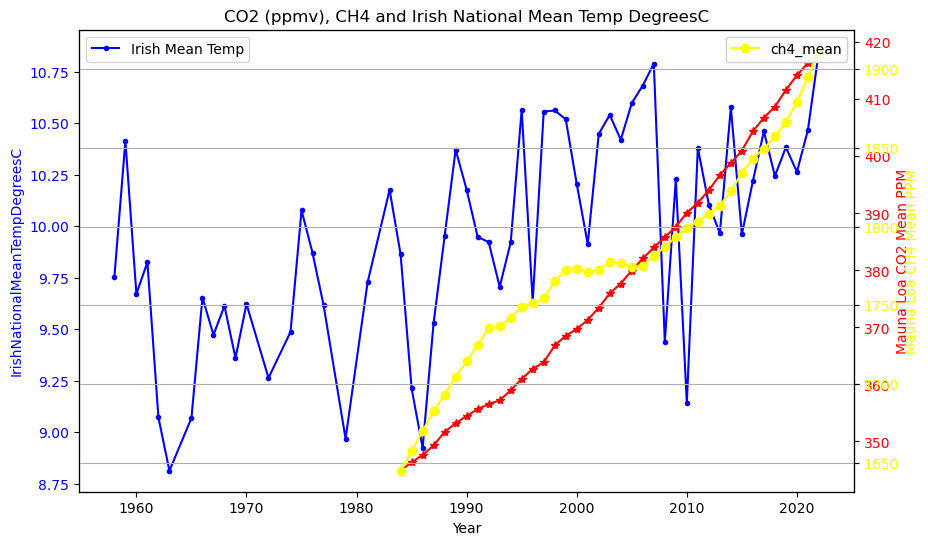

In [47]:
# Plotting Again
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot on the first y-axis
ax1.plot(composite.index, composite['IrishNationalMeanTempDegreesC'], label='Irish Mean Temp', marker='.', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('IrishNationalMeanTempDegreesC', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(composite.index, composite['co2_mean_ml'], label='co2_mean', marker='*', color='red')
ax2.set_ylabel('Mauna Loa CO2 Mean PPM', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Create a third y-axis
ax3 = ax1.twinx()
ax3.plot(composite.index, composite['ch4_mean_ml'], label='ch4_mean', marker='o', color='yellow')
ax3.set_ylabel('Mauna Loa CH4 Mean PPM', color='yellow')
ax3.tick_params(axis='y', labelcolor='yellow')
ax3.legend(loc='upper right')

# Set title of plot and show it
plt.title('CO2 (ppmv), CH4 and Irish National Mean Temp DegreesC')
plt.grid(True)
plt.show()

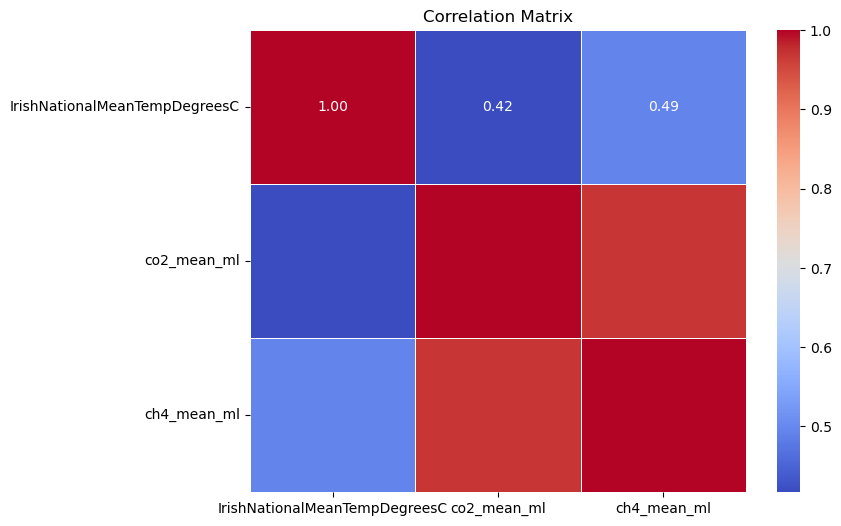

In [48]:
# Narrowing list of columns to just the relevant columns for correlation
columns_of_interest = ['IrishNationalMeanTempDegreesC', 'co2_mean_ml', 'ch4_mean_ml']

# Create a subset DataFrame with selected columns
subset_df = composite[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()